In [36]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [37]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
plantvillage-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [38]:
!ls

 class_indices.json   kaggle.json	      plantvillage-dataset.zip
 images.jpg	     'plantvillage dataset'   sample_data


In [39]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

# This cell provides imports. For strategies to improve model performance, refer to the agent's explanation.

In [40]:
with ZipFile('plantvillage-dataset.zip', 'r') as zip_ref:
    zip_ref.extractall()

In [41]:
base_dir = os.listdir("plantvillage dataset/color")

In [42]:
len(base_dir)

38

In [43]:
print(base_dir[0:5])
print(base_dir[-5:])

['Tomato___Target_Spot', 'Orange___Haunglongbing_(Citrus_greening)', 'Pepper,_bell___Bacterial_spot', 'Tomato___Septoria_leaf_spot', 'Grape___Esca_(Black_Measles)']
['Tomato___Leaf_Mold', 'Pepper,_bell___healthy', 'Strawberry___healthy', 'Soybean___healthy', 'Grape___Black_rot']


(256, 256, 3)


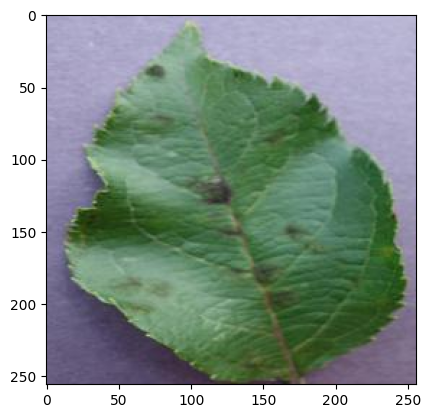

In [44]:
img_path = '/content/plantvillage dataset/color/Apple___Apple_scab/00075aa8-d81a-4184-8541-b692b78d398a___FREC_Scab 3335.JPG'
img = mpimg.imread(img_path)
plt.imshow(img)
print(img.shape)

In [45]:
print(img)

[[[167 163 196]
  [166 162 195]
  [165 161 194]
  ...
  [185 182 211]
  [183 180 209]
  [181 178 207]]

 [[170 166 199]
  [169 165 198]
  [168 164 197]
  ...
  [186 183 212]
  [184 181 210]
  [183 180 209]]

 [[170 166 199]
  [169 165 198]
  [168 164 197]
  ...
  [188 185 214]
  [186 183 212]
  [185 182 211]]

 ...

 [[100  90 124]
  [102  92 126]
  [104  94 128]
  ...
  [126 110 137]
  [126 110 137]
  [126 110 137]]

 [[101  91 125]
  [102  92 126]
  [103  93 127]
  ...
  [122 106 133]
  [123 107 134]
  [123 107 134]]

 [[104  94 128]
  [103  93 127]
  [102  92 126]
  ...
  [121 105 132]
  [122 106 133]
  [123 107 134]]]


In [46]:
img_size = 224
batch_size = 32

In [47]:
train_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,   # required for subset
    horizontal_flip=True
)


val_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2   # SAME split, but no augmentation
)

train_generator = train_gen.flow_from_directory(
    "plantvillage dataset/color",
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='sparse',
    subset='training',
    shuffle=True
)

validation_generator = val_gen.flow_from_directory(
    "plantvillage dataset/color",
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='sparse',
    subset='validation',
    shuffle=False
)



Found 43456 images belonging to 38 classes.
Found 10849 images belonging to 38 classes.


In [48]:
print(train_generator.class_indices)
print(validation_generator.class_indices)


{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___Powdery_mildew': 5, 'Cherry_(including_sour)___healthy': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___Northern_Leaf_Blight': 9, 'Corn_(maize)___healthy': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13, 'Grape___healthy': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___Late_blight': 21, 'Potato___healthy': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___Leaf_scorch': 26, 'Strawberry___healthy': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___Late_blight': 30, 'Tomato

In [49]:
train_generator.num_classes #this gives you number of classe present in your data

38

In [50]:
model = models.Sequential()

# Conv Block 1
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu',
                        input_shape=(img_size, img_size, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.2))


# Conv Block 2
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.2))


# Conv Block 3
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.2))


# Fully Connected
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

# Output
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     6,422,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 38)             │         2,470 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,519,462 (24.87 MB)

 Trainable params: 6,518,886 (24.87 MB)

 Non-trainable params: 576 (2.25 KB)

In [52]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=0.00003),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [53]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [54]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.3,
    patience=2,
    min_lr=1e-6,
    verbose=1
)


In [55]:
from sklearn.utils import class_weight
import numpy as np

class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)

class_weights = dict(enumerate(class_weights))

In [56]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    class_weight=class_weights,   # important for PlantVillage
    callbacks=[early_stop, reduce_lr]
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 128s 88ms/step - accuracy: 0.2520 - loss: 2.9036 - val_accuracy: 0.4761 - val_loss: 2.2568 - learning_rate: 3.0000e-05
Epoch 2/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 110s 81ms/step - accuracy: 0.5523 - loss: 1.6495 - val_accuracy: 0.5756 - val_loss: 1.7554 - learning_rate: 3.0000e-05
Epoch 3/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 109s 80ms/step - accuracy: 0.6562 - loss: 1.2773 - val_accuracy: 0.6059 - val_loss: 1.5466 - learning_rate: 3.0000e-05
Epoch 4/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 110s 81ms/step - accuracy: 0.7195 - loss: 1.0643 - val_accuracy: 0.6723 - val_loss: 1.2761 - learning_rate: 3.0000e-05
Epoch 5/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 108s 80ms/step - accuracy: 0.7598 - loss: 0.9071 - val_accuracy: 0.6508 - val_loss: 1.3034 - learning_rate: 3.0000e-05
Epoch 6/20
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 116s 85ms/step - accuracy: 0.7893 - loss: 0.7937 - val_accuracy: 0.7412 - val_loss: 1.0260 - learning_rate: 3.0000e-05
Epoch 7/20
1358/1358 ━━━━━━━━━━━━━

In [57]:
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(val_accuracy)

339/339 ━━━━━━━━━━━━━━━━━━━━ 16s 47ms/step - accuracy: 0.9124 - loss: 0.3523
0.9050516486167908


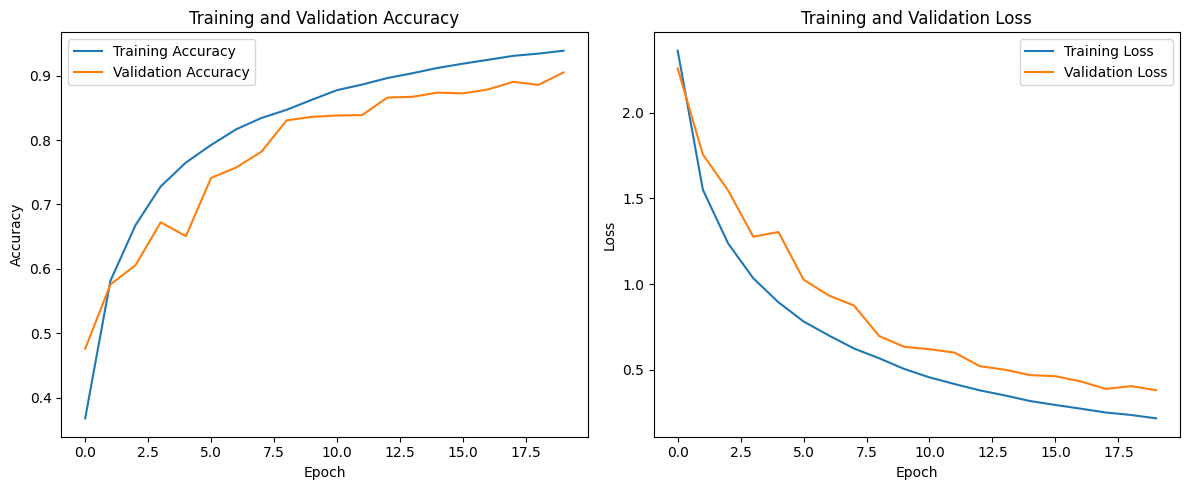

In [58]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

Function to load and preprocess an image


In [59]:
def load_and_preprocess_image(image_path, img_size):
    img = Image.open(image_path)
    img = img.resize((img_size, img_size))
    img_array = np.array(img)
    img_array = img_array / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0) # Add batch dimension
    return img_array

print("load_and_preprocess_image function defined.")

load_and_preprocess_image function defined.


In [60]:
def predict_image_class(model, preprocessed_image, class_names):
    predictions = model.predict(preprocessed_image)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_names[predicted_class_index]
    return predicted_class_name

print("predict_image_class function defined.")

predict_image_class function defined.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 744ms/step
The predicted class for the image is: Apple___Black_rot


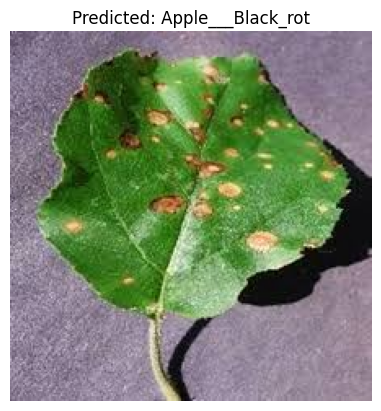

In [61]:
# Get class names from the training generator
class_indices = train_generator.class_indices
class_names = dict((v, k) for k, v in class_indices.items())

# Define the path to the image you want to predict on
new_image_path = '/content/images.jpg'

# Load and preprocess the new image
preprocessed_image = load_and_preprocess_image(new_image_path, img_size)

# Make a prediction
predicted_class = predict_image_class(model, preprocessed_image, list(class_names.values()))

# Display the predicted class
print(f"The predicted class for the image is: {predicted_class}")

# Display the image for context
plt.imshow(Image.open(new_image_path))
plt.title(f"Predicted: {predicted_class}")
plt.axis('off')
plt.show()

In [62]:
json.dump(class_indices,open('class_indices.json','w'))

In [63]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [65]:
model.save('/content/drive/My Drive/my_model1.h5')